In [6]:
import networkx as nx
import matplotlib.pyplot as plt

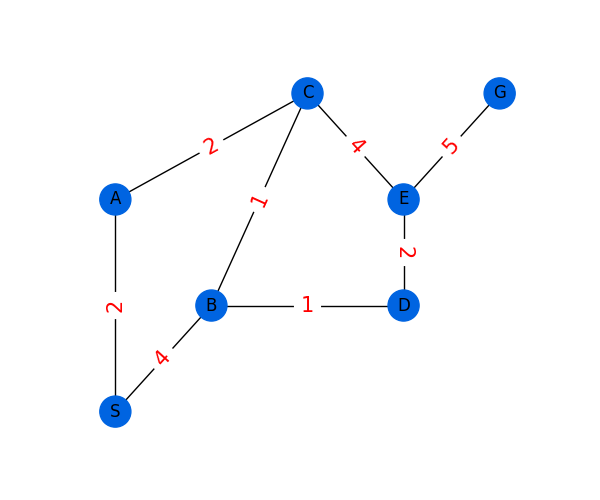

In [8]:
DEFAULT_COLOR = "#0064e1"

def graph_factory():

    node_positions = {
        "S": (0, 0),
        "A": (0, 2),
        "B": (1, 1),
        "C": (2, 3),
        "D": (3, 1),
        "E": (3, 2),
        "G": (4, 3),
    }

    node_colors = {node: DEFAULT_COLOR for node in node_positions.keys()}

    node_attrs = {"positions": node_positions, "colors": node_colors}

    G = nx.Graph()

    G.add_edge("S", "A", weight=2)
    G.add_edge("S", "B", weight=4)
    G.add_edge("A", "C", weight=2)
    G.add_edge("B", "C", weight=1)
    G.add_edge("C", "E", weight=4)
    G.add_edge("B", "D", weight=1)
    G.add_edge("D", "E", weight=2)
    G.add_edge("E", "G", weight=5)

    return G, node_attrs


G, node_attrs = graph_factory()


def draw_graph(ax, G, node_attrs, edge_labels=False):
    nx.draw(G,
            ax=ax,
            pos=node_attrs["positions"],
            with_labels=True,
            node_size=500,
            nodelist=list(node_attrs["colors"].keys()),
            node_color=list(node_attrs["colors"].values()),
            )
    
    if edge_labels:
        nx.draw_networkx_edge_labels(
            G,
            ax=ax,
            pos=node_attrs["positions"],
            edge_labels={edge: G.edges[edge]["weight"] for edge in G.edges},
            font_size=15,
            font_color="red",
            )


fig, ax = plt.subplots(figsize=(6, 5))
draw_graph(ax, G, node_attrs, edge_labels=True)
plt.show()

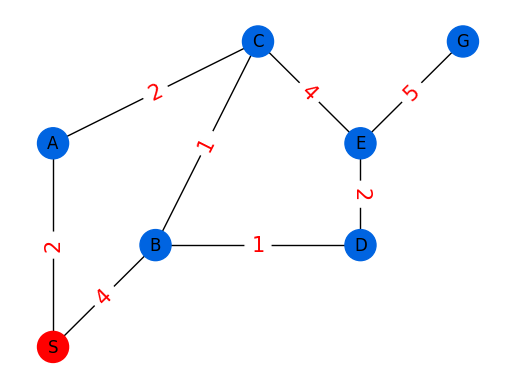

In [3]:
node_attrs["colors"]["S"] = "red"
fig, ax = plt.subplots()
draw_graph(ax, G, node_attrs, edge_labels=True)
plt.show()

## Animate the graph

In [9]:
import matplotlib.animation as animation
import random
%matplotlib widget

In [5]:
# fig, ax = plt.subplots(figsize=(5, 5))

# G, node_attrs = graph_factory()

# draw_graph(ax, G, node_attrs)

# def update(frame):
#     global G, node_attrs
#     ax.clear()
#     nodes = list(node_attrs["colors"].keys())
#     node_attrs["colors"][nodes[frame]] = "red"
#     draw_graph(ax, G, node_attrs)

# ani = animation.FuncAnimation(fig, func=update, interval=1000, frames=7)
# plt.show()

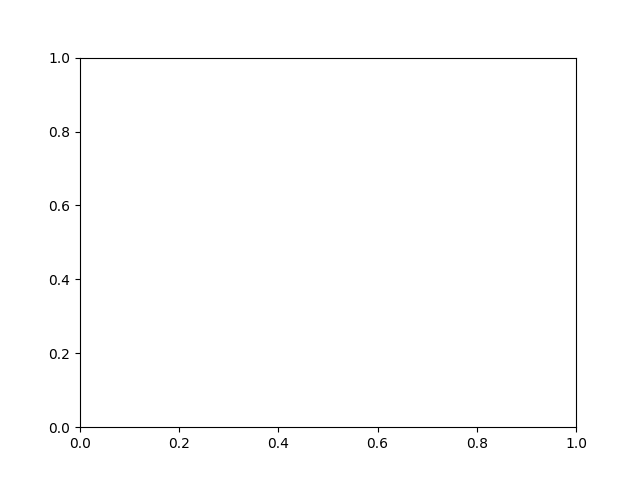

In [14]:

G, node_attrs = graph_factory()

def update(frame):
    ax.clear()
    nx.draw_networkx_nodes(G, pos=node_attrs["positions"], node_color=DEFAULT_COLOR, ax=ax)
    nx.draw_networkx_edges(G, pos=node_attrs["positions"], ax=ax)
    nx.draw_networkx_labels(G, pos=node_attrs["positions"], labels={k: k for k in G.nodes}, ax=ax)

    node = frame
    nx.draw_networkx_nodes(G, nodelist=node, pos=node_attrs["positions"][node], node_color="red", ax=ax)
    nx.draw_networkx_labels(G, nodelist=node, pos=node_attrs["positions"][node], labels={node: node}, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])

fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update, interval=1000, frames=list(G.nodes()))
plt.show()
